In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, LSTM, GRU, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
tf.__version__
keras.__version__

'2.7.0'

In [2]:
from scipy.io import loadmat

data = pd.read_csv('trainData7ClassTest1No1.csv')
annots = loadmat('trainLabels7ClassTest1No1OneHotnew.mat')
target = annots['trainLabels']

print(data.shape)
print(target.shape)
print(data.iloc[0:48,0:48])
print(target[:,1:10])

(48, 53056)
(7, 53056)
       14.995         15     15.005      15.01     15.015      15.02  \
0    0.070938   0.072422   0.077188   0.078828   0.081250   0.080234   
1    0.071406   0.073672   0.077578   0.078750   0.081719   0.080156   
2    0.072656   0.078594   0.078359   0.080547   0.081953   0.078750   
3    0.071797   0.079141   0.077969   0.083281   0.082187   0.078359   
4    0.071875   0.078672   0.077031   0.083047   0.082187   0.078750   
5    0.071563   0.078281   0.076953   0.082500   0.080859   0.077891   
6    0.071016   0.078203   0.077031   0.081641   0.080469   0.073984   
7    0.071953   0.077500   0.078359   0.080937   0.079766   0.072500   
8    0.515625   0.515625   0.515625   0.515625   0.515625   0.515625   
9    0.515625   0.515625   0.515625   0.515625   0.515625   0.515625   
10   0.515625   0.515625   0.515625   0.515625   0.515625   0.515625   
11   0.515625   0.515625   0.515625   0.515625   0.515625   0.515625   
12   0.515625   0.515625   0.515625   0.5

In [3]:
dataT = np.transpose(data)
print(dataT.shape)
newData = data.iloc[:,0:48]
print(newData.shape)

(53056, 48)
(48, 48)


In [4]:
windows = []

for i in range(dataT.shape[0]-47):
    window = dataT[i:i+48]
    windows.append(np.expand_dims(window, 0))

dataRoll = np.vstack(windows)

targetRoll = target[:,:-47]

print(dataRoll.shape)
print(targetRoll.shape)
print(dataRoll[0])

(53009, 48, 48)
(7, 53009)
[[ 0.0709375   0.07140625  0.07265625 ... 27.         33.
  31.        ]
 [ 0.07242187  0.07367187  0.07859375 ... 27.         34.
  31.        ]
 [ 0.0771875   0.07757812  0.07835937 ... 27.         34.
  31.        ]
 ...
 [ 0.07765625  0.07773437  0.08054688 ... 26.         32.
  31.        ]
 [ 0.0834375   0.084375    0.08445313 ... 27.         33.
  32.        ]
 [ 0.08117188  0.08085937  0.08101562 ... 27.         33.
  31.        ]]


In [5]:
newDataT = np.swapaxes(dataRoll,1,2)
newTargetT = np.transpose(targetRoll)
print(newTargetT.shape)
print(newDataT.shape)
print(newDataT[0])

(53009, 7)
(53009, 48, 48)
[[ 0.0709375   0.07242187  0.0771875  ...  0.07765625  0.0834375
   0.08117188]
 [ 0.07140625  0.07367187  0.07757812 ...  0.07773437  0.084375
   0.08085937]
 [ 0.07265625  0.07859375  0.07835937 ...  0.08054688  0.08445313
   0.08101562]
 ...
 [27.         27.         27.         ... 26.         27.
  27.        ]
 [33.         34.         34.         ... 32.         33.
  33.        ]
 [31.         31.         31.         ... 31.         32.
  31.        ]]


In [6]:
trainData, testData, trainTarget, testTarget = train_test_split(newDataT, newTargetT, test_size=.2, random_state=0) #np.transpose()

print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

print(trainData[0])
print(testTarget[:,1])

(42407, 48, 48)
(10602, 48, 48)
(42407, 7)
(10602, 7)
[[ 0.11773438  0.1128125   0.10953125 ...  0.120625    0.12585937
   0.12859375]
 [ 0.11835938  0.11859375  0.1103125  ...  0.12328125  0.12835937
   0.13140625]
 [ 0.11742187  0.11757813  0.1090625  ...  0.1234375   0.12851562
   0.13140625]
 ...
 [28.         29.         29.         ... 32.         32.
  31.        ]
 [32.         32.         32.         ... 32.         32.
  33.        ]
 [32.         33.         33.         ... 33.         33.
  33.        ]]
[0 0 0 ... 0 0 0]


2022-04-27 03:11:01.077567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 03:11:01.384797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 03:11:01.385141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 03:11:01.386887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 03:11:01.387170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48)]     0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 1600)         5433600     ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 1600)         0           ['bidirectional[0][0]']          
                                                                                                  
 batch_normalization (BatchNorm  (None, 1600)        6400        ['flatten[0][0]']                
 alization)                                                                                   

2022-04-27 03:11:12.586272: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


332/332 [==============================] - 23s 50ms/step - loss: 0.7787 - accuracy: 0.6866 - val_loss: 4.1284 - val_accuracy: 0.3120
Epoch 2/1000
332/332 [==============================] - 15s 46ms/step - loss: 0.6032 - accuracy: 0.7567 - val_loss: 4.9605 - val_accuracy: 0.2344
Epoch 3/1000
332/332 [==============================] - 15s 46ms/step - loss: 0.4576 - accuracy: 0.8238 - val_loss: 4.8670 - val_accuracy: 0.2027
Epoch 4/1000
332/332 [==============================] - 15s 46ms/step - loss: 0.2328 - accuracy: 0.9132 - val_loss: 3.4251 - val_accuracy: 0.3526
Epoch 5/1000
332/332 [==============================] - 15s 46ms/step - loss: 0.1902 - accuracy: 0.9274 - val_loss: 0.9101 - val_accuracy: 0.7391
Epoch 6/1000
332/332 [==============================] - 15s 46ms/step - loss: 0.1335 - accuracy: 0.9518 - val_loss: 3.8175 - val_accuracy: 0.3251
Epoch 7/1000
332/332 [==============================] - 16s 50ms/step - loss: 0.0975 - accuracy: 0.9647 - val_loss: 0.5864 - val_accuracy

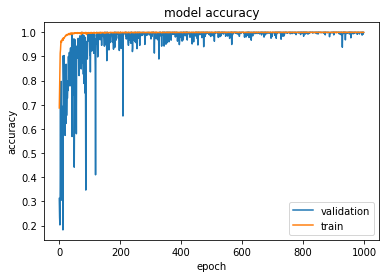

In [7]:
# NN LSTM

input = keras.layers.Input(shape=[48,48])
bi1 = keras.layers.Bidirectional(LSTM(800))(input)
flat = keras.layers.Flatten(input_shape=[48,48])(bi1)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(400, activation="tanh")(batch1)
drop1 = keras.layers.Dropout(0.1)(hidden1)
hidden2 = keras.layers.Dense(100, activation="LeakyReLU")(drop1)
concat = keras.layers.Concatenate()([flat, hidden2])
output = keras.layers.Dense(7, activation="softmax")(concat)
model = keras.Model(inputs=[input], outputs=[output])

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#with tf.device("/device:GPU:1"):
history = model.fit(trainData, trainTarget, epochs=1000, batch_size=128, validation_data=(testData, testTarget))

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation', 'train'], loc='lower right')